In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rdkit
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [11]:
solubility = pd.read_csv('../data/intermediate/solubility.csv')

In [12]:
solubility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58810 entries, 0 to 58809
Columns: 209 entries, CID to size
dtypes: float64(206), object(3)
memory usage: 93.8+ MB


In [13]:
solubility.head()

,CID,std_temp,FP,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,size
0,CID_00000,462.65,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,11.984096,-0.494253,11.984096,0.027149,0.507381,371.478,338.214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,large
1,CID_00001,519.00,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,14.628345,-1.058673,14.628345,0.037222,0.815581,361.388,340.220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,large
2,CID_00002,456.65,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,10.301851,-0.913655,10.301851,0.736759,0.664344,274.057,267.001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium
3,CID_00003,375.15,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,9.049972,-0.076466,9.049972,0.076466,0.903515,285.774,269.646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium
4,CID_00004,519.15,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,13.202943,-1.882482,13.202943,0.044880,0.837269,348.358,332.230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,large


In [14]:
#The feature of interest is std_temp 

#first we need to drop unusable columns

#we will not use FP or size (as size is redundant with MolWt)

sol = solubility.drop(['FP', 'size'], axis='columns')
sol.head()

,CID,std_temp,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CID_00000,462.65,11.984096,-0.494253,11.984096,0.027149,0.507381,371.478,338.214,371.242021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CID_00001,519.00,14.628345,-1.058673,14.628345,0.037222,0.815581,361.388,340.220,361.148950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CID_00002,456.65,10.301851,-0.913655,10.301851,0.736759,0.664344,274.057,267.001,273.949077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CID_00003,375.15,9.049972,-0.076466,9.049972,0.076466,0.903515,285.774,269.646,285.092042,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CID_00004,519.15,13.202943,-1.882482,13.202943,0.044880,0.837269,348.358,332.230,348.111007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#first, since we will not be using any categorical features, we do not need to get dummies or one-hot encode 

#let's split our data into train and test sets (it is important that we do this before scaling our data)

In [19]:
from sklearn.model_selection import train_test_split

X = np.array(sol[['std_temp']])
y = np.array(sol.drop(['CID', 'std_temp'], axis='columns'))

print(X.shape)
print(y.shape)

(58810, 1)
(58810, 205)


In [21]:
#this will split our data into training and test sets randomly, with the default ratio of 0.25 for test set
#and 0.75 for train set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(44107, 1)
(14703, 1)
(44107, 205)
(14703, 205)


In [35]:
#now that we have performed our random split, let's scale the data, first using a standardscaler 
from sklearn.preprocessing import StandardScaler

SS_scaler = StandardScaler()

SS_scaler.fit(y_train)
y_train_standard_transformed = SS_scaler.transform(y_train)

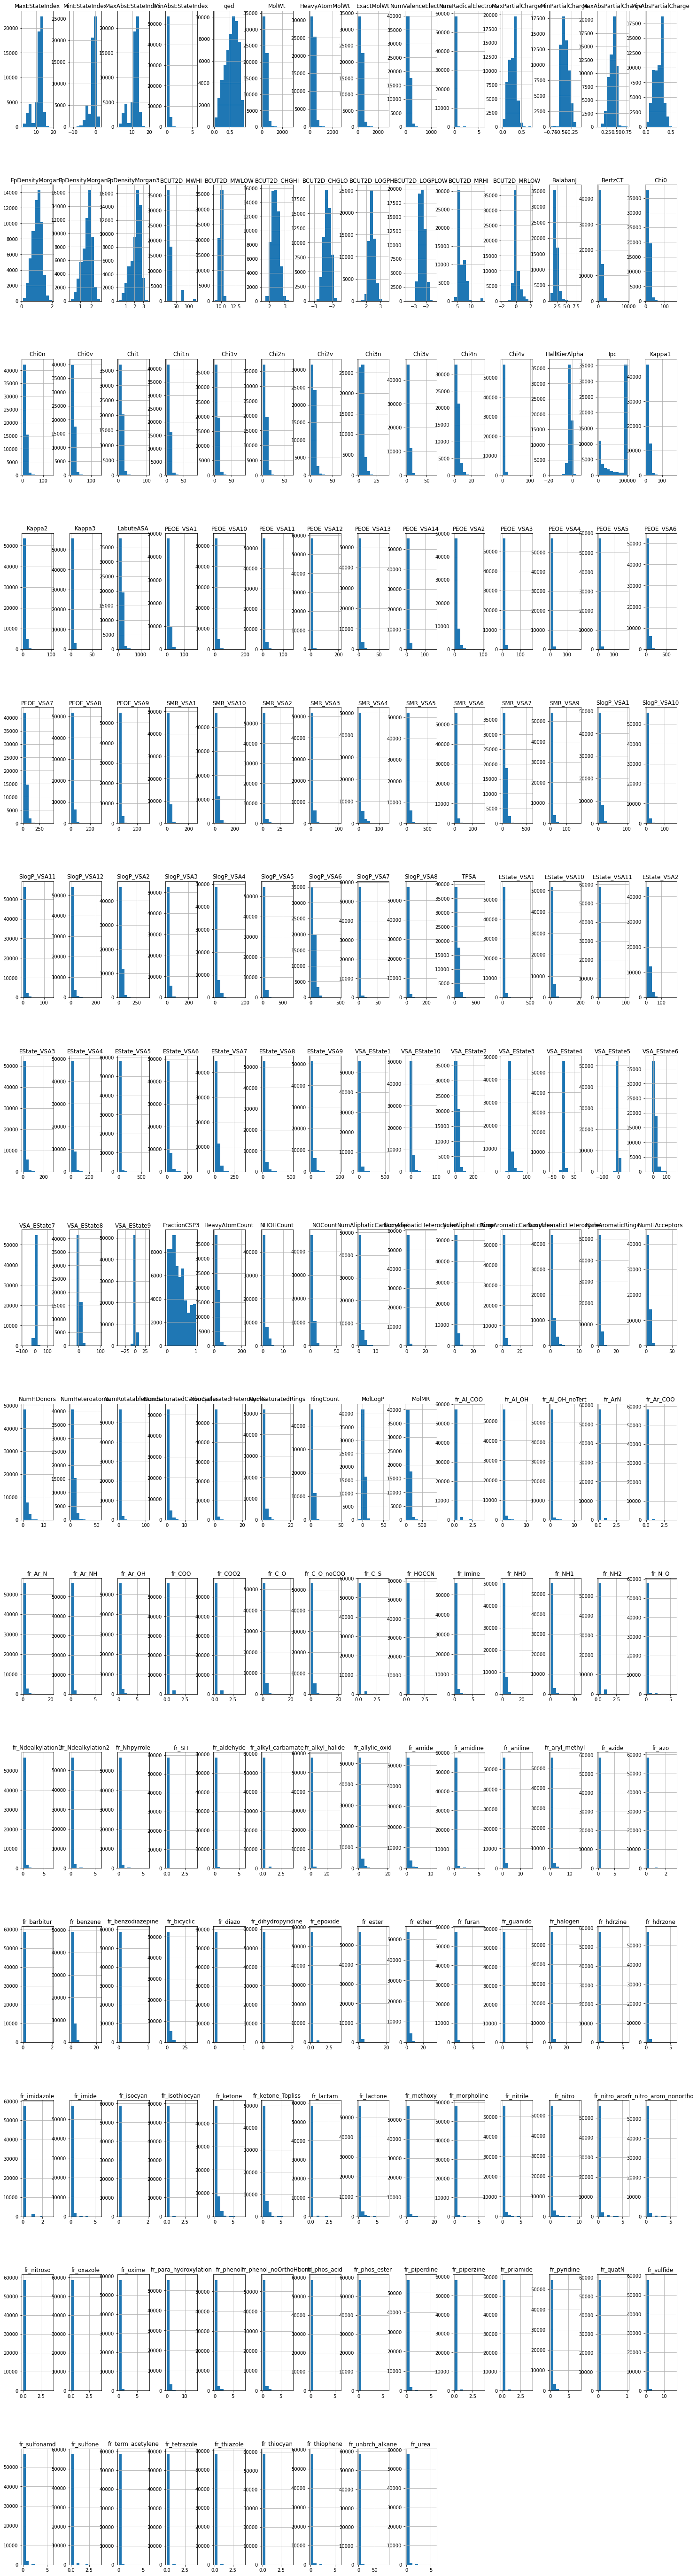

In [28]:
sol.drop(['CID', 'std_temp'], axis='columns').hist(figsize=(25,100))
plt.subplots_adjust(hspace=0.5, wspace=0.5);

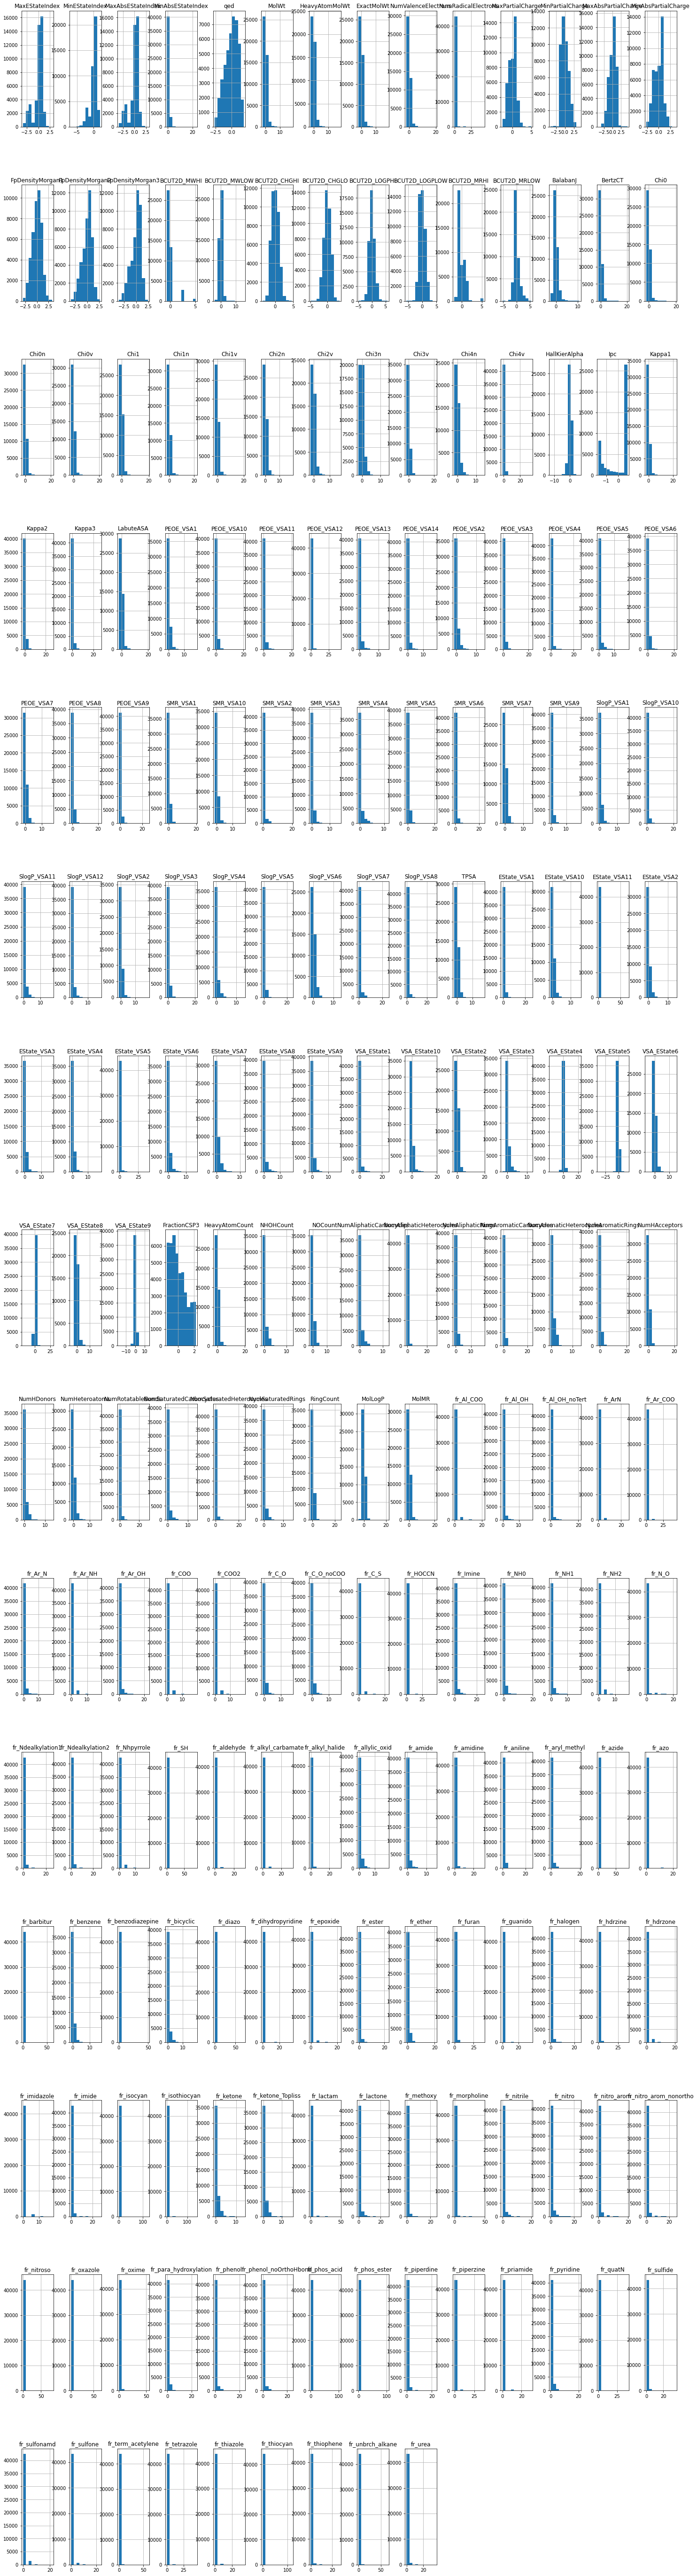

In [36]:
standard_df = pd.DataFrame(y_train_standard_transformed, 
                           columns=sol.drop(['CID', 'std_temp'], axis='columns').columns)
standard_df.hist(figsize=(25,100))
plt.subplots_adjust(hspace=0.5, wspace=0.5);

In [31]:
#we can see that this transformed our data so that it is now centered around 0

In [32]:
#now let's try a log transformer, since a lot of our data is tailed


In [37]:
from sklearn.preprocessing import PowerTransformer

pow_scaler = PowerTransformer()

pow_scaler.fit(y_train)
y_train_pow_transformed = pow_scaler.transform(y_train)

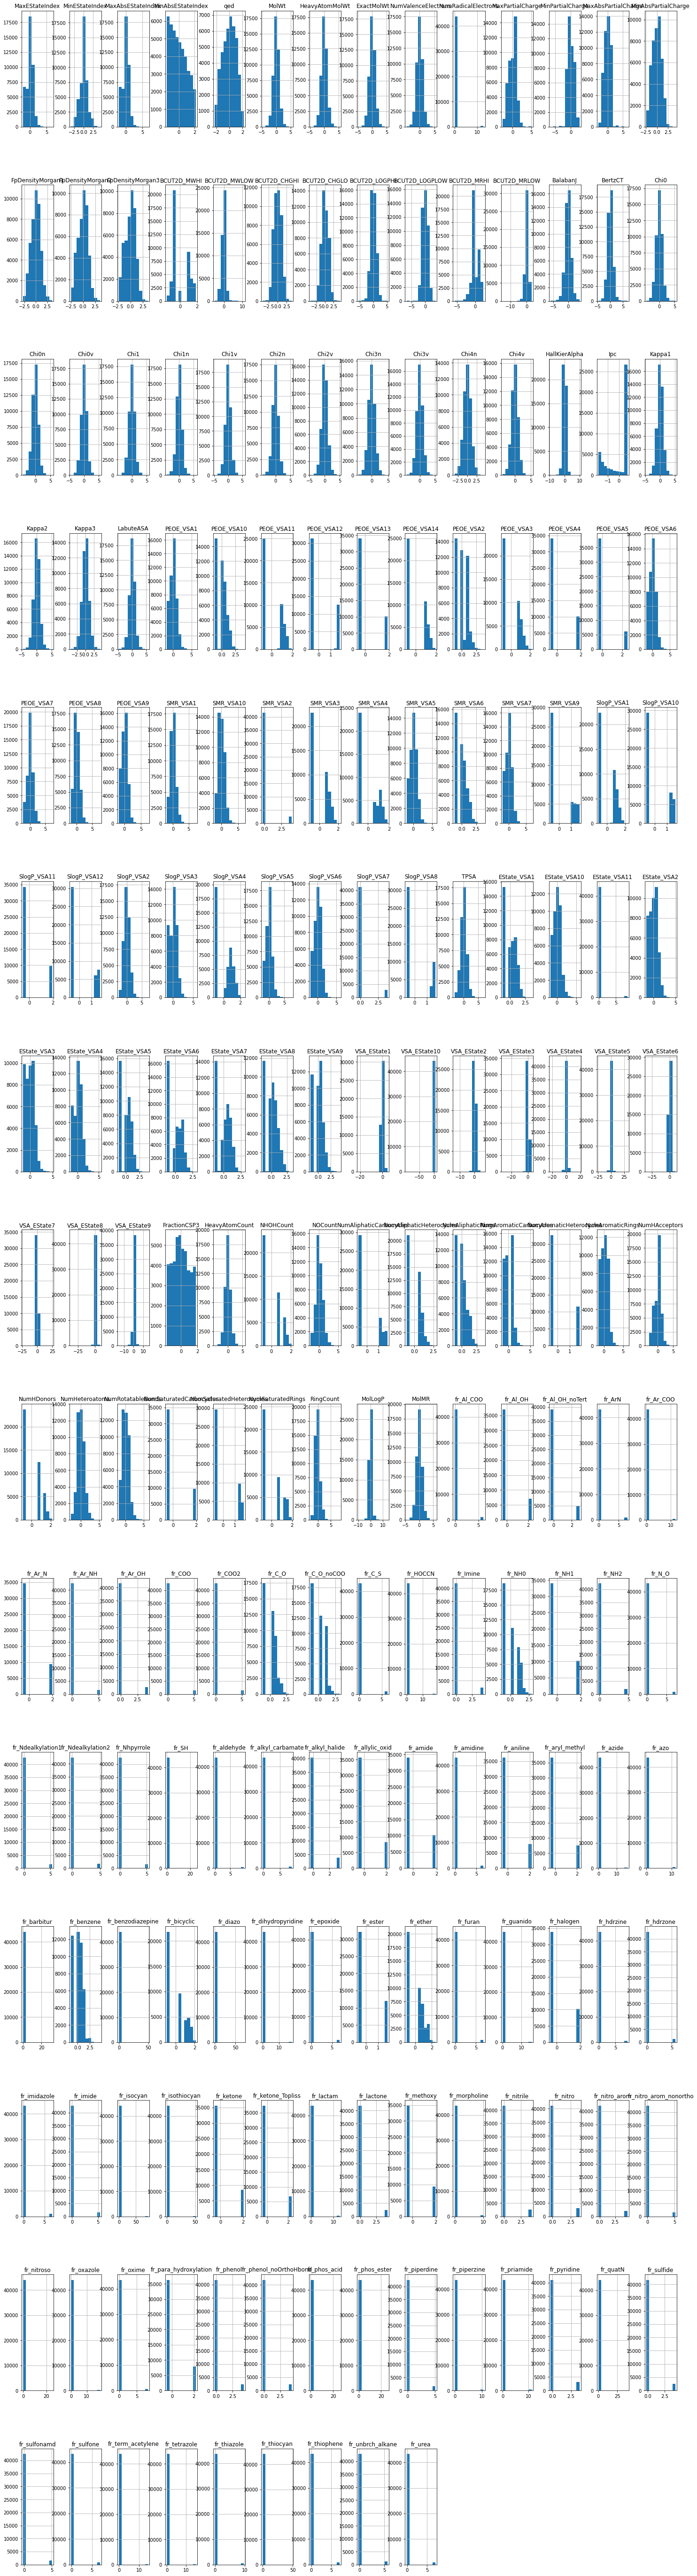

In [38]:
pow_df = pd.DataFrame(y_train_pow_transformed, columns=sol.drop(['CID', 'std_temp'], axis='columns').columns)
pow_df.hist(figsize=(25,100))
plt.subplots_adjust(hspace=0.5, wspace=0.5);

In [41]:
#now much of our data looks more Gaussian-like